# Hotel Reviews Analysis

In the following project I will analyse the hotel reviews provided by Datafiniti's Business Database. The dataset contains 1400 hotel reviews from customers. The goal of this project is to experiment with natural language processing (NLP). 

## Import Packages

In [2]:
#Data Wrangling
import pandas as pd
import numpy as np

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Natural Language Processing (NLP)
from textblob import TextBlob

## Import Data

In [3]:
HotelReview = pd.read_csv("Datafiniti_Hotel_Reviews_Jun19.csv") # Import the CSV-File
HotelReview.info() # Get some info about the imported file

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10000 non-null  object 
 1   dateAdded             10000 non-null  object 
 2   dateUpdated           10000 non-null  object 
 3   address               10000 non-null  object 
 4   categories            10000 non-null  object 
 5   primaryCategories     10000 non-null  object 
 6   city                  10000 non-null  object 
 7   country               10000 non-null  object 
 8   keys                  10000 non-null  object 
 9   latitude              10000 non-null  float64
 10  longitude             10000 non-null  float64
 11  name                  10000 non-null  object 
 12  postalCode            10000 non-null  object 
 13  province              10000 non-null  object 
 14  reviews.date          10000 non-null  object 
 15  reviews.dateAdded   

## Data Preparation and Exploration

First we want to explore the dataset.

In [3]:
HotelReview.head()

,id,dateAdded,dateUpdated,address,categories,primaryCategories,city,country,keys,latitude,...,reviews.dateSeen,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sourceURLs,websites
0,AWE2FvX5RxPSIh2RscTK,2018-01-18T18:43:12Z,2019-05-20T23:55:47Z,5620 Calle Real,"Hotels,Hotels and motels,Hotel and motel mgmt....",Accommodation & Food Services,Goleta,US,us/ca/goleta/5620callereal/-1127060008,34.44178,...,2018-01-03T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3243...,"This hotel was nice and quiet. Did not know, t...",Best Western Plus Hotel,San Jose,UnitedStates,tatsurok2018,https://www.tripadvisor.com/Hotel_Review-g3243...,https://www.bestwestern.com/en_US/book/hotel-r...
1,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,4,https://www.tripadvisor.com/Hotel_Review-g3217...,We stayed in the king suite with the separatio...,Clean rooms at solid rates in the heart of Carmel,San Francisco,CA,STEPHEN N,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
2,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-09T00:00:00Z,3,https://www.tripadvisor.com/Hotel_Review-g3217...,"Parking was horrible, somebody ran into my ren...",Business,Prescott Valley,AZ,15Deborah,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
3,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,2016-10-31T00:00:00Z,5,https://www.tripadvisor.com/Hotel_Review-g3217...,Not cheap but excellent location. Price is som...,Very good,Guaynabo,PR,Wilfredo M,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com
4,AVwcj_OhkufWRAb5wi9T,2016-11-06T20:21:05Z,2019-05-20T23:31:56Z,5th And San Carlos PO Box 3574,"Hotels,Lodging,Hotel",Accommodation & Food Services,Carmel by the Sea,US,us/ca/carmelbythesea/5thandsancarlospobox3574/...,36.55722,...,"2016-10-09T00:00:00Z,2016-03-27T00:00:00Z",2,https://www.tripadvisor.com/Hotel_Review-g3217...,If you get the room that they advertised on th...,Low chance to come back here,Reno,NV,Luc D,http://www.tripadvisor.com/Hotel_Review-g32172...,http://www.bestwestern.com


The reviews consist of a text body and a title. As it seems, the title contains valuable information, which is why we cannot limit ourselves to the textbody. Interestingly the dataset includes also a rating score in form of a likert scale. This allows us later on to compare the output of the sentiment analysis of the text reviews with the rating scores.

In [4]:
HotelReview['reviews.rating'].describe()

count    10000.000000
mean         4.084100
std          1.152371
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: reviews.rating, dtype: float64

(array([ 567.,    0.,  554.,    0.,    0., 1190.,    0., 2849.,    0.,
        4840.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

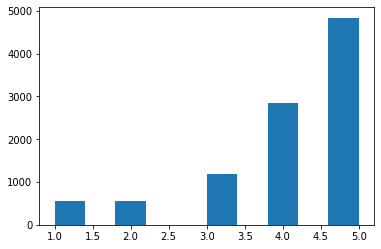

In [5]:
plt.hist(HotelReview['reviews.rating'])

## Sentiment Analysis

Now we can perform a sentiment analysis to distil the emotional values of the text.

In [21]:
# Let's see a few examples
print(TextBlob("The best hotel ever").sentiment)
print(TextBlob("I didn't like it very much").sentiment)

Sentiment(polarity=1.0, subjectivity=0.3)
Sentiment(polarity=0.26, subjectivity=0.26)


The first statement was classified as very positive, which is plausible. But the seconde statement, which is pretty negative, also got classified as positive. So it seems that TextBlob won't classify every review correctly, but maybe it's still good enough to extract some interesting insights.

TextBlob uses a lexicon (https://github.com/sloria/TextBlob/blob/eb08c120d364e908646731d60b4e4c6c1712ff63/textblob/en/en-sentiment.xml) which stores polarity and subjectivity scores for every word. If there are multiple words, i.e. in a sentence, it simply averages the scores of each individual word. 

See the following example:

In [8]:
print(TextBlob("great").sentiment)
print(TextBlob("bad").sentiment)
print(TextBlob("great bad").sentiment)

Sentiment(polarity=0.8, subjectivity=0.75)
Sentiment(polarity=-0.6999999999999998, subjectivity=0.6666666666666666)
Sentiment(polarity=0.0500000000000001, subjectivity=0.7083333333333333)


#### Text Sentiments

Now we will create the polarity and subjectivity scores for every review text and every review title.

In [16]:
# Create sentiment metrics for the texts
text = [TextBlob(text) for text in HotelReview['reviews.text']]
HotelReview['Text.Pol'] = [b.sentiment.polarity for b in text]
HotelReview['Text.Subj'] = [b.sentiment.subjectivity for b in text]

https://medium.com/swlh/simple-sentiment-analysis-for-nlp-beginners-and-everyone-else-using-vader-and-textblob-728da3dbe33d

In [14]:
pd.set_option('display.max_colwidth', -1) # so that we can see the whole review text
HotelReview[['reviews.text', 'Text.Pol', 'Text.Subj']] # display a few examples

D:\Statsprograms\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,reviews.text,Text.Pol,Text.Subj
0,"This hotel was nice and quiet. Did not know, there was train track near by. But it was only few train passed during our stay. Best Western changed hotel classification. The Plus category are not the same as before.",0.187500,0.407292
1,"We stayed in the king suite with the separation between the bedroom and the living space. The sofa bed wasn't very good I had back discomfort by the day we left on our three night stay. The room is clean, and the king bed very comfortable. This hotel is located within walking distance to most places you will want to... More",0.399524,0.497143
2,"Parking was horrible, somebody ran into my rental car while staying there. I didn't get to try the breakfast, I was there for business so the restaurant opened to late for the business world to enjoy, I had to asked for coffee for my room, And the items in the vending machine were stale.",-0.350000,0.650000
3,"Not cheap but excellent location. Price is somewhat standard for not hacing reservations. But room was nice and clean. They offer good continental breakfast which is a plus and compensates. Front desk service and personnel where excellent. It is Carmel, no A/C in rooms but they have a fan for air circulation.",0.495238,0.714286
4,"If you get the room that they advertised on the website and for what you paid, you may be lucky.If you stay many days , they will give you the not so good rooms.Nobody wants to stay in these rooms: low light/dark rooms, near pool, noisy, smelly bathrooms, or difficult access. If you stay one-two days you will get probably... More",0.214286,0.485714
...,...,...,...
9995,My friends and I took a trip to Hampton for the Basslights show and booked us a couple rooms for Saturday and Sunday. When we arrived around 7am we realized we should have booked more than 2 rooms because of how many people we had and went to the concierge to check if there were any additional rooms available. They... More,0.475000,0.475000
9996,"from check in to departure, staff is friendly, professional and wanting to help. the property is clean, the rooms clean and quiet and very comfortable. the area made me feel very safe. i even walked to my work and other businesses. parking is very adequate.",0.298519,0.532407
9997,"This Hampton is located on a quiet street across from a hospital, located minutes from Langley/Ft Eutis Base. Easy access to I-40. A hop skip and jump from Virginia Beach, and Williamsburg. Overall the hotel was busy with lots of guests but not overcrowded. The rooms were clean and comfortable.",0.071429,0.566667
9998,"Awesome wings (my favorite was garlic parmesan) and a great atmosphere! Not to mention they have an awesome music selection, a lottery machine and arcade games to cure your boredom! The owners are amazing!Thank you!",0.875000,0.937500


In [30]:
# Create sentiment metrics for the titles
HotelReview['reviews.title'] = HotelReview['reviews.title'].astype(str) # because some values seem to be 'float'
title = [TextBlob(title) for title in HotelReview['reviews.title']]
HotelReview['Title.Pol'] = [b.sentiment.polarity for b in title]
HotelReview['Title.Subj'] = [b.sentiment.subjectivity for b in title]

In [31]:
pd.set_option('display.max_colwidth', -1) # so that we can see the whole review text
HotelReview[['reviews.title', 'Title.Pol', 'Title.Subj']] # display a few examples

D:\Statsprograms\Anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,reviews.title,Title.Pol,Title.Subj
0,Best Western Plus Hotel,0.500000,0.150
1,Clean rooms at solid rates in the heart of Carmel,0.183333,0.400
2,Business,0.000000,0.000
3,Very good,0.910000,0.780
4,Low chance to come back here,0.000000,0.150
...,...,...,...
9995,Very accommodating and friendly staff!,0.334375,0.400
9996,"comfortable, friendly, clean, professional",0.310417,0.525
9997,Great location,0.800000,0.750
9998,Great Atmosphere!,1.000000,0.750


# Correlations

In the next step we will analyze some correlations.

In [32]:
from scipy.stats import spearmanr
print(spearmanr(HotelReview['Title.Pol'], HotelReview['Text.Pol']))

SpearmanrResult(correlation=0.3104101616415508, pvalue=2.780732296355151e-222)


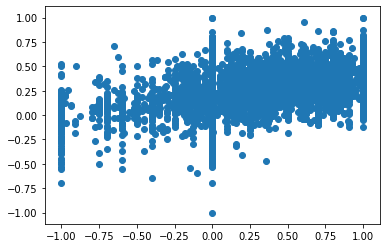

In [33]:
plt.scatter(HotelReview['Title.Pol'], HotelReview['Text.Pol'])

In [34]:
print(spearmanr(HotelReview['reviews.rating'], HotelReview['Title.Pol']))

SpearmanrResult(correlation=0.38276034815663035, pvalue=0.0)


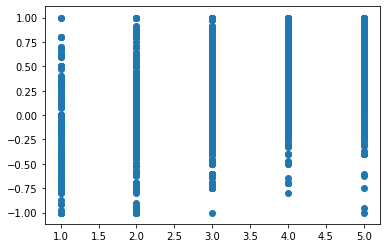

In [35]:
plt.scatter(HotelReview['reviews.rating'], HotelReview['Title.Pol'])

In [36]:
print(spearmanr(HotelReview['reviews.rating'], HotelReview['Text.Pol']))

SpearmanrResult(correlation=0.5388804782844248, pvalue=0.0)


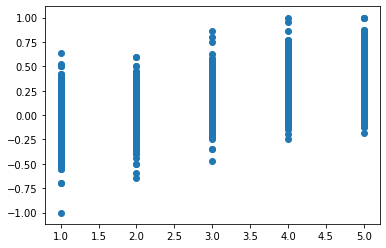

In [37]:
plt.scatter(HotelReview['reviews.rating'], HotelReview['Text.Pol'])

#### Title Sentiments

In [47]:
# Create sentiment metrics
text = [TextBlob(text) for text in HotelReview['reviews.title']]
HotelReview['Title.Pol'] = [b.sentiment.polarity for b in text]
HotelReview['Title.Subj'] = [b.sentiment.subjectivity for b in text]

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <class 'float'>

## Identify the customer pain points

Classify the text content. What are the top reasons why the customers a unhappy?